In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

color = sns.color_palette()

In [2]:
df = pd.read_csv('G:\My Drive\Jun\Mechine Learning\Data Science\Capstone 3\EDAData.csv', index_col=None)
df.head()

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Issue,Consumer complaint narrative,Company,State,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
0,10,Closing your account,NaN,PENTAGON FEDERAL CREDIT UNION,VA,NaN,Referral,2019-11-21,Closed with explanation,Yes,NaN
1,22,Problem when making payments,I was shocked when I reviewed my credit report...,JPMORGAN CHASE & CO.,MS,Consent provided,Web,2019-02-27,Closed with explanation,Yes,NaN
2,41,Problem when making payments,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",NJ,Consent not provided,Web,2019-05-10,Closed with explanation,Yes,NaN
3,102,Getting a credit card,I have been in USA two times as XXXX student (...,DISCOVER BANK,PA,Consent provided,Web,2019-02-24,Closed with non-monetary relief,Yes,NaN
4,120,"Other features, terms, or problems",NaN,"CITIBANK, N.A.",FL,Consent not provided,Web,2019-03-23,Closed with explanation,Yes,NaN


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162433 entries, 0 to 162432
Data columns (total 10 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Issue                         162433 non-null  object
 1   Consumer complaint narrative  54687 non-null   object
 2   Company                       162433 non-null  object
 3   State                         159106 non-null  object
 4   Consumer consent provided?    86290 non-null   object
 5   Submitted via                 162433 non-null  object
 6   Date sent to company          162433 non-null  object
 7   Company response to consumer  162433 non-null  object
 8   Timely response?              162433 non-null  object
 9   Consumer disputed?            88003 non-null   object
dtypes: object(10)
memory usage: 12.4+ MB


In [4]:
df.fillna('NA', inplace=True)

In [5]:
df['Date sent to company'] = pd.to_datetime(df['Date sent to company'])

In [6]:
# Let's first check on trends of comsumer complaints
df['Year'] = df['Date sent to company'].dt.year
df['Month'] = df['Date sent to company'].dt.month
df['Day'] = df['Date sent to company'].dt.weekday#
#df['Month_Year'] = pd.to_datetime(df[['Year', 'Month']].assign(Day=1))
df['Month_year'] = pd.to_datetime(df['Date sent to company']).dt.to_period('M')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

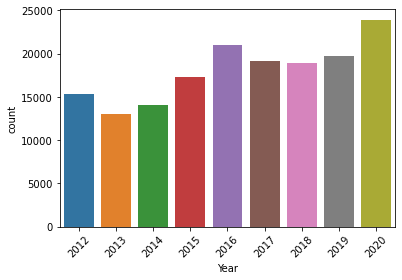

In [7]:
# Consumer complaints by Year
sns.countplot(x='Year', data=df)
plt.xticks(rotation=45)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107]),
 <a list of 108 Text major ticklabel objects>)

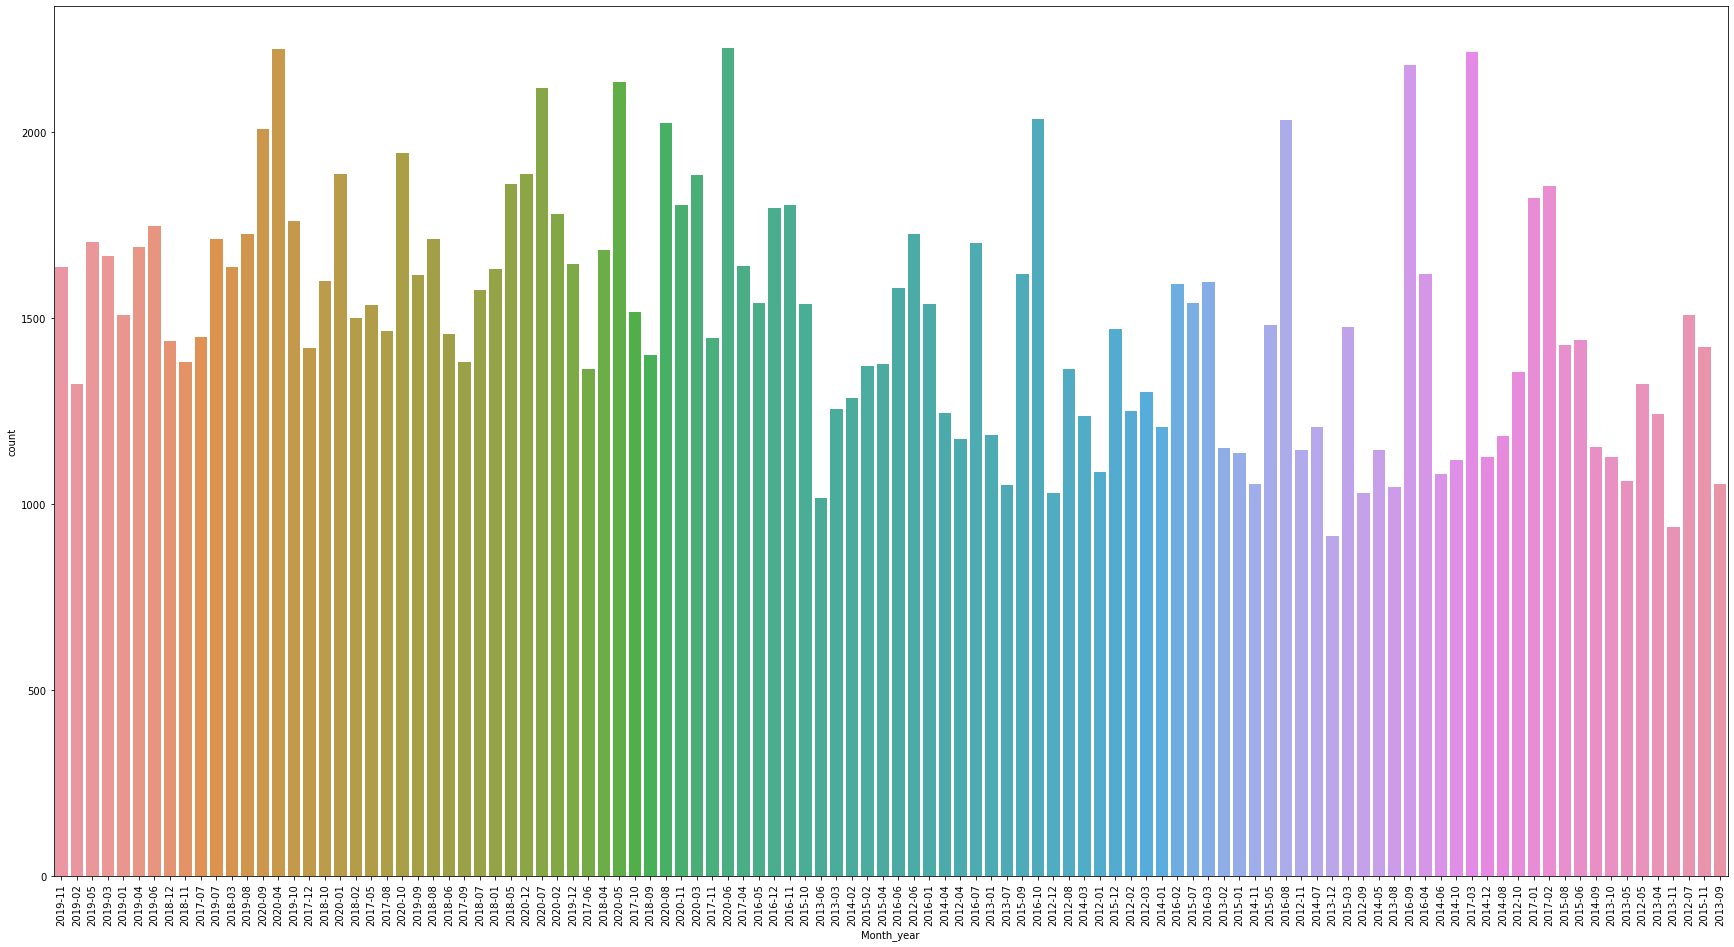

In [8]:
# Consumer complaints by month and year
plt.figure(figsize=(30,16))
sns.countplot(x='Month_year', data=df)
plt.xticks(rotation=90)

#### Although there are up and down in terms of the counts of consumer complaints on credit card. The overall trend is that there is a continous growth of consumer complaints.

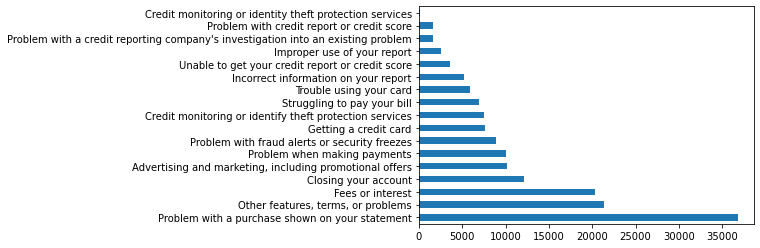

In [9]:
df['Issue'].value_counts().plot(kind='barh')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

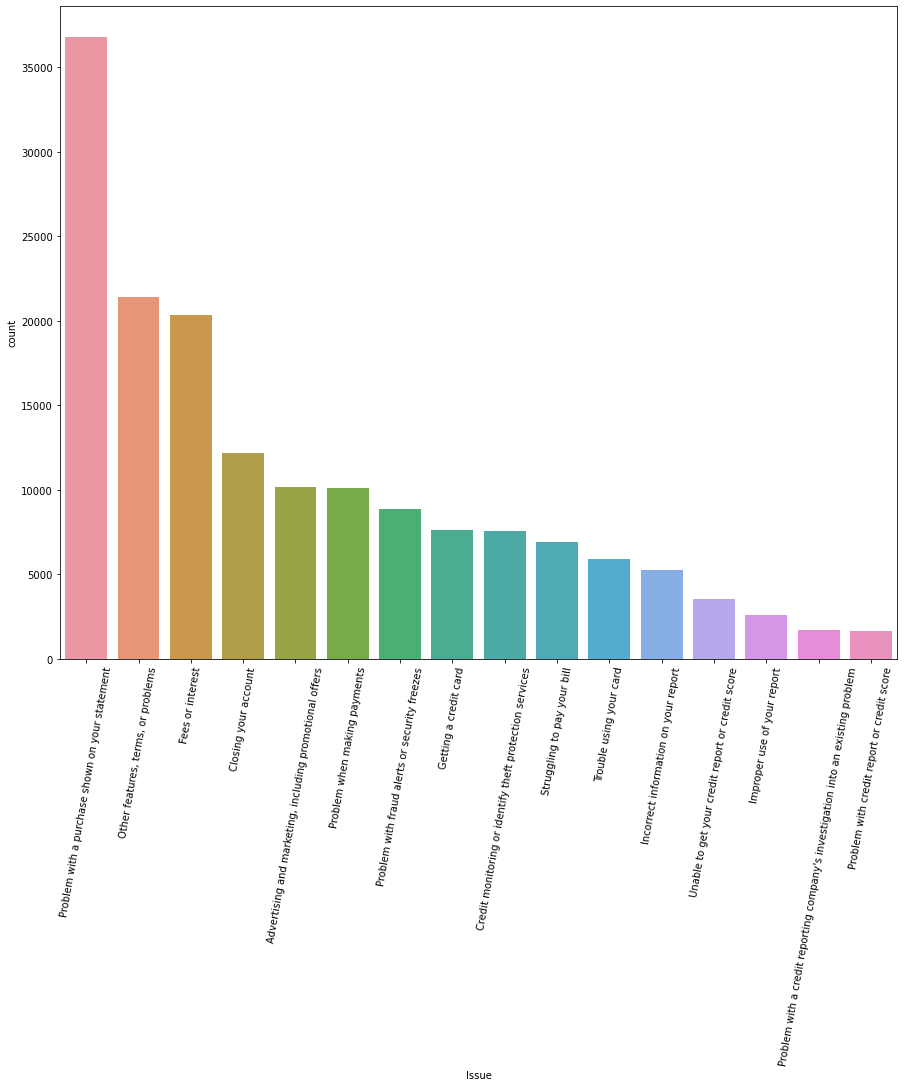

In [13]:
# Let's check on issues being complained about  
plt.figure(figsize=(15,12))
sns.countplot(x='Issue', order=df['Issue'].value_counts().index[:16], data=df)
plt.xticks(rotation=80)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

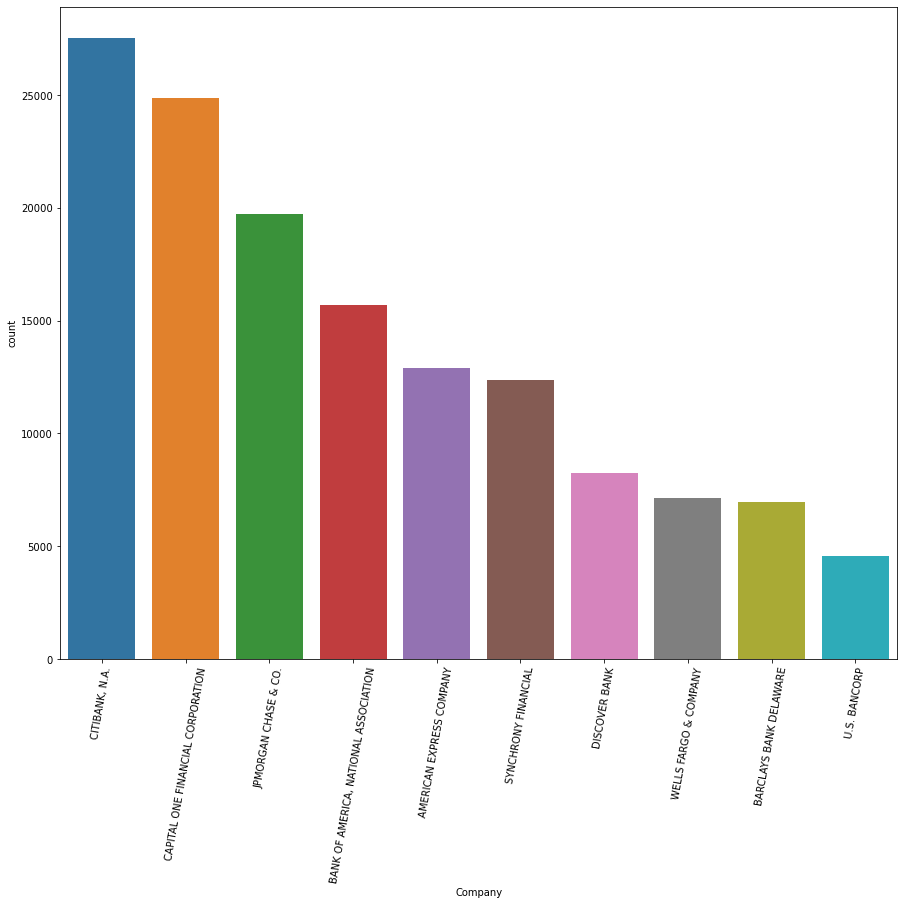

In [14]:
# Which companies got the most complaints  
plt.figure(figsize=(15,12))
sns.countplot(x='Company', order=df['Company'].value_counts().index[:10], data=df)
plt.xticks(rotation=80)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

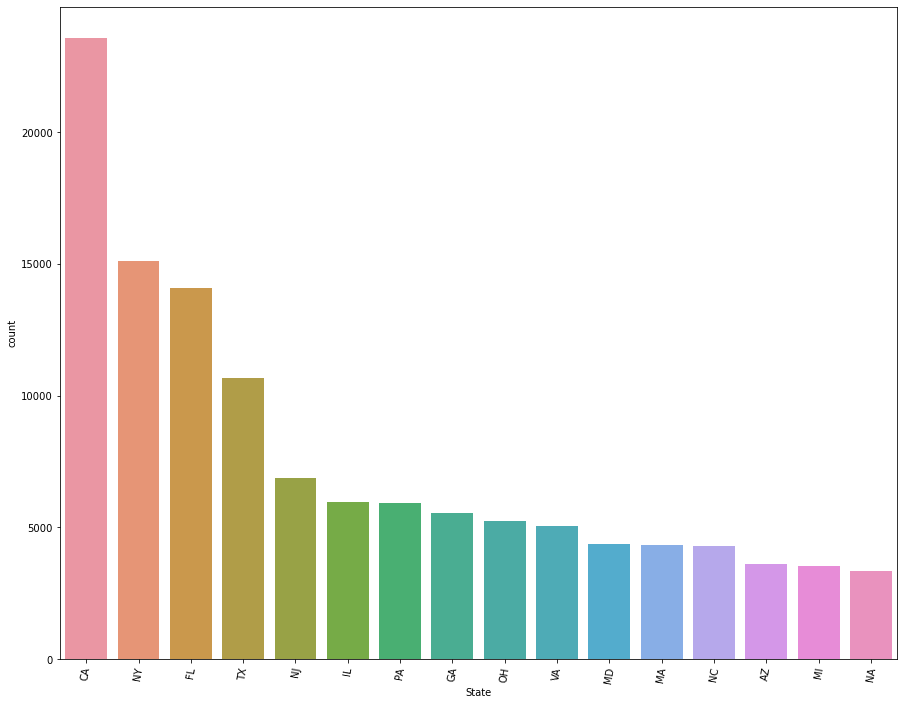

In [15]:
# Which States got the most complaints?
plt.figure(figsize=(15,12))
sns.countplot(x='State', order=df['State'].value_counts().index[:16], data=df)
plt.xticks(rotation=80)

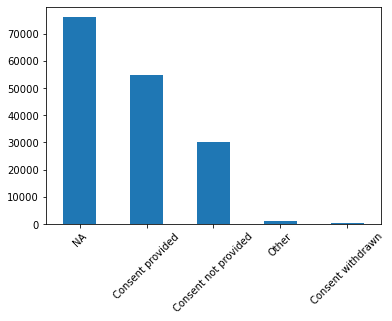

In [16]:
df['Consumer consent provided?'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

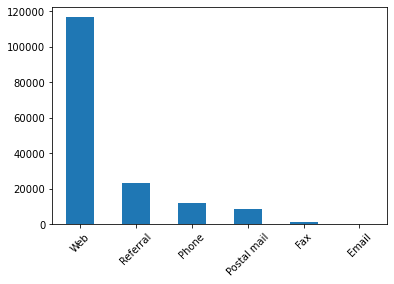

In [18]:
df['Submitted via'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

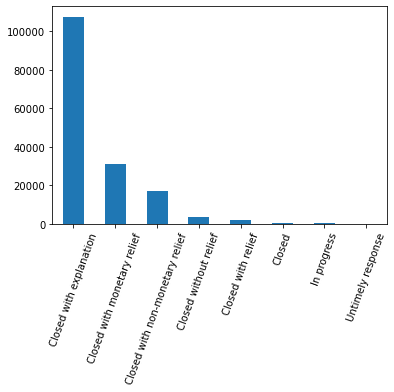

In [19]:
df['Company response to consumer'].value_counts().plot(kind='bar')
plt.xticks(rotation=70)
plt.show()

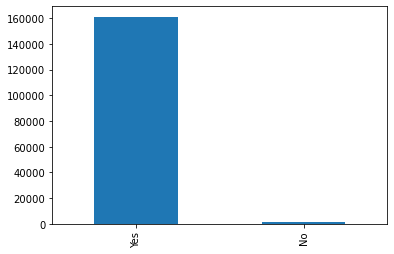

In [20]:
df['Timely response?'].value_counts().plot(kind='bar')

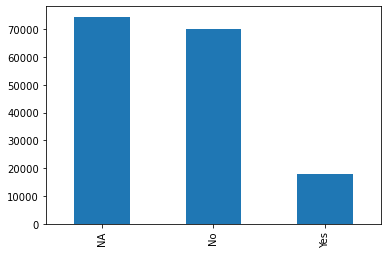

In [21]:
df['Consumer disputed?'].value_counts().plot(kind='bar')

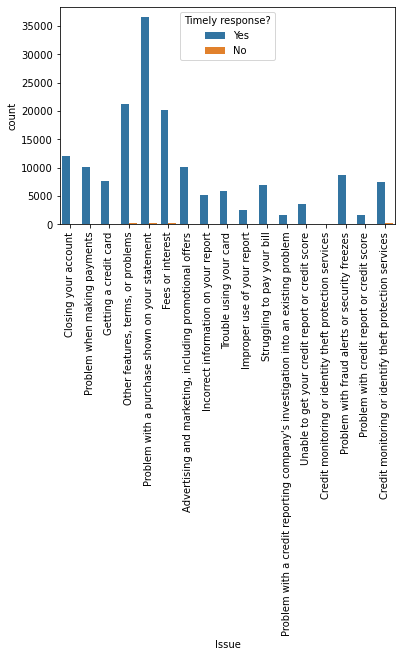

In [22]:
# Issue vs Timely response
_ = sns.countplot(x='Issue', data=df, hue='Timely response?')
_ = plt.xticks(rotation=90)

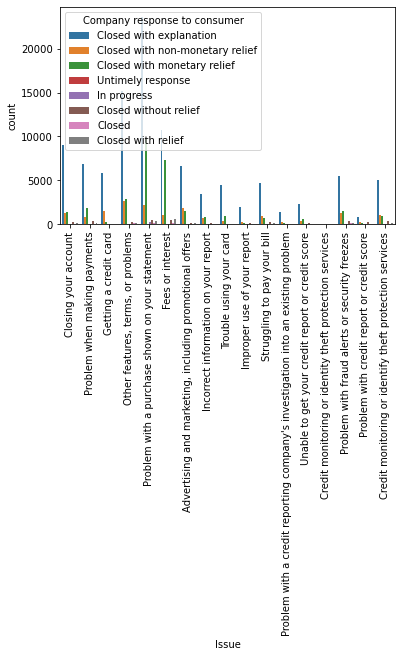

In [23]:
# Issue vs Timely response
_ = sns.countplot(x='Issue', data=df, hue='Company response to consumer')
_ = plt.xticks(rotation=90)

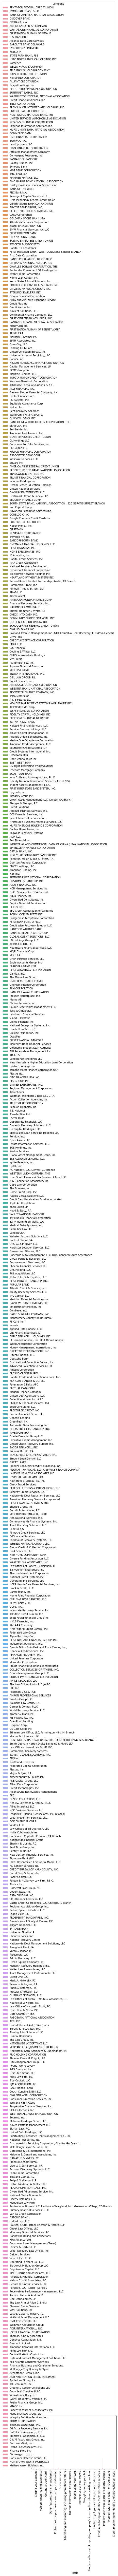

In [24]:
# Issue vs Timely response
_ = sns.countplot(x='Issue', data=df, hue='Company')
_ = plt.xticks(rotation=90)